In [110]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



In [111]:
tf.__version__

'2.0.0-rc0'

In [112]:
keras.__version__

'2.2.4-tf'

In [113]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [114]:
X_train_full.shape

(60000, 28, 28)

In [115]:
X_train_full.dtype

dtype('uint8')

In [116]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train[0]]

'Coat'

In [117]:
y_train[0]

4

In [118]:
model=keras.models.Sequential()

In [1]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


NameError: name 'model' is not defined

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.layers

In [122]:
model.layers[1].name

'dense_9'

In [123]:
model.layers[2].name

'dense_10'

In [124]:
weights,biases=model.layers[1].get_weights()

In [125]:
weights


array([[ 0.01380175, -0.05443114, -0.04988014, ..., -0.06891433,
        -0.029845  , -0.06722849],
       [-0.02440842,  0.03110141,  0.05575988, ...,  0.05457224,
         0.00804128,  0.03409801],
       [ 0.03460339,  0.05637021,  0.01225929, ..., -0.04944079,
         0.03953044,  0.00907037],
       ...,
       [-0.01939822,  0.07320206,  0.03477199, ..., -0.01029682,
        -0.01615956, -0.04631291],
       [ 0.04254188,  0.02469505,  0.01030786, ...,  0.05653769,
         0.0077701 , -0.00177114],
       [ 0.06483397, -0.0003679 , -0.0661103 , ..., -0.03711414,
         0.02661164, -0.05275039]], dtype=float32)

In [126]:
weights.shape

(784, 300)

In [127]:
biases


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [128]:
biases.shape

(300,)

In [129]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])


In [130]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.7195 - accuracy: 0.7673 - val_loss: 0.5102 - val_accuracy: 0.8296
Epoch 2/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4885 - accuracy: 0.8306 - val_loss: 0.4463 - val_accuracy: 0.8500
Epoch 3/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4460 - accuracy: 0.8449 - val_loss: 0.4131 - val_accuracy: 0.8618
Epoch 4/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.4184 - accuracy: 0.8556 - val_loss: 0.4087 - val_accuracy: 0.8636
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3986 - accuracy: 0.8603 - val_loss: 0.3854 - val_accuracy: 0.8664
Epoch 6/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3828 - accuracy: 0.8655 - val_loss: 0.3779 - val_accuracy: 0.8718
Epoch 7/30
55000/55000 [==============================] -

In [131]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [132]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [133]:
history.history

{'loss': [0.7194545717065984,
  0.4884963249119845,
  0.44604242227077484,
  0.41844436791593376,
  0.39856770168651234,
  0.38282357609055256,
  0.370354896922545,
  0.35725045434128155,
  0.3484237682602622,
  0.3383230023644187,
  0.329301938013597,
  0.32015047284473075,
  0.3133506785999645,
  0.30614632393880326,
  0.29997656483433466,
  0.293599101452394,
  0.28672036379250615,
  0.2816222468332811,
  0.27565553195476533,
  0.27094603995409877,
  0.2656309564059431,
  0.26067599301338196,
  0.2574210106394508,
  0.2519757975274866,
  0.24745668933066456,
  0.2436025216145949,
  0.23944525230364366,
  0.235949566024,
  0.23247814405831424,
  0.22824891444986517],
 'accuracy': [0.7673454,
  0.8306,
  0.84485453,
  0.85563636,
  0.8603455,
  0.8654909,
  0.87,
  0.8740909,
  0.8771818,
  0.87832725,
  0.8818727,
  0.88445455,
  0.88714546,
  0.8906909,
  0.8929273,
  0.8951455,
  0.8965091,
  0.8992182,
  0.9012727,
  0.90238184,
  0.9037455,
  0.9069818,
  0.90672725,
  0.9101273,

In [134]:
import pandas as pd

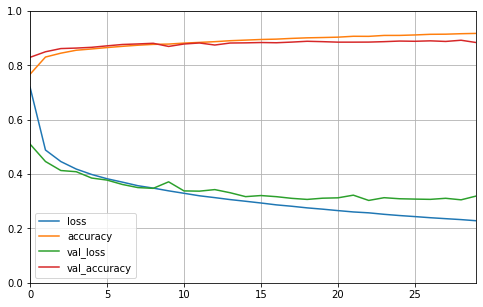

In [135]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()









In [136]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[62.95834712533951, 0.8508]

In [137]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [138]:
y_pred=model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [139]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)